In [117]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

### Defining the variables
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**u** = (u<sub>1</sub>,u<sub>2</sub>)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d** = (3.5,2)  


In [118]:
d = np.array([3.5,2])
u = cp.Variable(2)

### Defining the Inequality Constraints
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*f<sub>1</sub>(u): &nbsp;&nbsp; u<sub>1</sub> + 2u<sub>2</sub> <= 12*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*f<sub>2</sub>(u): &nbsp;&nbsp; 2u<sub>1</sub> + u<sub>2</sub> <= 12*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*f<sub>3</sub>(u): &nbsp;&nbsp; u<sub>1</sub> >= d<sub>1</sub>*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*f<sub>4</sub>(u): &nbsp;&nbsp; u<sub>2</sub> >= d<sub>2</sub>*  

In [119]:
fi = [
    u[0]+2*u[1]<=12,
    2*u[0]+u[1]<=12,
    u[0]>=d[0],
    u[1]>=d[1]
]

### Defining the Objective Function

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*f<sub>0</sub>(u): &nbsp; log(u<sub>1</sub> - d<sub>1</sub>) + log(u<sub>2</sub> - d<sub>2</sub>)*  

The solution of the problem **u**<sub>opt</sub> is defined as:  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**u** <sub>opt</sub> = argmax *f<sub>0</sub>(u)* &nbsp;&nbsp;&nbsp; such that **u** <sub>opt</sub> ∈ *F*  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; subject to *f<sub>i</sub>*(*u*) <= 0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *i = 1,2,...,m*

In [120]:
f0 = cp.Maximize(cp.log(u[0] - d[0]) + cp.log(u[1] - d[1]))

### Primal Optimal Value
Primal Optimal Value is the extremum (in this case maximum) of the objective function i.e. *f<sub>0</sub>*(***u***<sub>*opt*</sub>).  

**u**<sub>opt</sub> = (4.2499, 3.5000)  

*f<sub>0</sub>*(***u***<sub>*opt*</sub>) = 0.117783  

In [121]:
problem = cp.Problem(f0,fi)
problem.solve()

print("Primal Optimal value of f\u2080(u) = {:}".format(problem.value))
print("Optimal \033[1mu\033[0m = ({:}, {:})".format(u[0].value,u[1].value))

Primal Optimal value of f₀(u) = 0.11778302006338115
Optimal u = (4.24999993461712, 3.500000107376267)


### Dual Problem
Define dual variables *v<sub>1</sub>, v<sub>2</sub>, v<sub>3</sub>, v<sub>4</sub>* associated with inequalities *f<sub>1</sub>, f<sub>2</sub>, f<sub>3</sub>, f<sub>4</sub>* respectively.  

Define Langrangian L(*u<sub>1</sub>,u<sub>2</sub>,v<sub>1</sub>,v<sub>2</sub>,v<sub>3</sub>,v<sub>4</sub>*) = *log(u<sub>1</sub> - d<sub>1</sub>) + log(u<sub>2</sub> - d<sub>2</sub>) + v<sub>1</sub>(12 - u<sub>1</sub> - 2u<sub>2</sub>) + v<sub>2</sub>(12 - 2u<sub>1</sub> - u<sub>2</sub>) + v<sub>3</sub>(u<sub>1</sub> - d<sub>1</sub>) + v<sub>4</sub>(u<sub>2</sub> - d<sub>2</sub>)*  

Dual Problem minimises the Langrangian subject to the Primal problem's constraints.  

Taking the partial derivate of the Langrangian w.r.t *u<sub>1</sub>* and *u<sub>2</sub>*:  

∂L/∂*u<sub>1</sub>* = 0  
1/(*u<sub>1</sub>* - *d<sub>1</sub>*) - *v<sub>1</sub>* - 2*v<sub>2</sub>* + *v<sub>3</sub>* = 0  

∂L/∂*u<sub>2</sub>* = 0  
1/(*u<sub>2</sub>* - *d<sub>2</sub>*) - 2*v<sub>1</sub>* - *v<sub>2</sub>* + *v<sub>4</sub>* = 0  

Solving for *u<sub>1</sub> and u<sub>2</sub>* and substituting in the Langrangian gives the extremum of the objective function subject to *v<sub>1</sub>, v<sub>2</sub>, v<sub>3</sub>, v<sub>4</sub>* >= 0.  

Solving this dual problem gives the dual variables associated with each constraint.  

In [122]:
print("Optimal dual variables: ")
print("     f\u2081(u) = {:}".format(fi[0].dual_value))
print("     f\u2082(u) = {:}".format(fi[1].dual_value))
print("     f\u2083(u) = {:}".format(fi[2].dual_value))
print("     f\u2084(u) = {:}".format(fi[3].dual_value))

Optimal dual variables: 
     f₁(u) = 3.6166849623599824e-09
     f₂(u) = 0.6666667547894941
     f₃(u) = 3.2025660895117705e-09
     f₄(u) = 1.5362072965007218e-09


### Comparative Statics
Fixing *d<sub>2</sub>* at 2 and varying *d<sub>1</sub>* over the interval [2,5] gives the solutions of the new problem (*u<sub>1</sub>, u<sub>2</sub>*) for each pair of (*d<sub>1</sub>, d<sub>2</sub>*).  



In [123]:
d_b = np.array([np.linspace(2,5,100), np.ones(100)*2])
u_arr = np.zeros((2,100))

for i in range(100):
    u_b = cp.Variable(2)
    f0_b = cp.Maximize(cp.log(u_b[0] - d_b[0,i]) +  cp.log(u_b[1] - d_b[1,i]))

    fi_b = [
        u_b[0]+2*u_b[1]<=12,
        2*u_b[0]+u_b[1]<=12,
        u_b[0]>=d_b[0,i],
        u_b[1]>=d_b[1,i]
    ]

    problem = cp.Problem(f0_b, fi_b)
    problem.solve()

    u_arr[:, i] = u_b.value


Plot for *u<sub>1</sub>* and *u<sub>2</sub>* varying with *d<sub>1</sub>* varying over [2,5]:

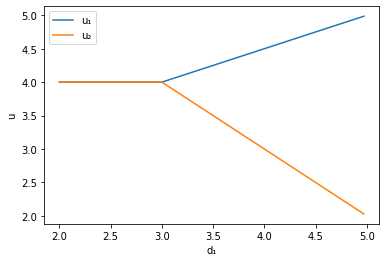

In [129]:
plt.plot(d_b[0],u_arr[0], label = 'u\u2081')
plt.plot(d_b[0],u_arr[1], label = 'u\u2082')
plt.xlabel('d\u2081')
plt.ylabel('u')
plt.legend()
plt.show()